In [60]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (10,8)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [4]:
round(df[df.sex == 'Female']['age'].mean(), 2)

36.86

In [5]:
df['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

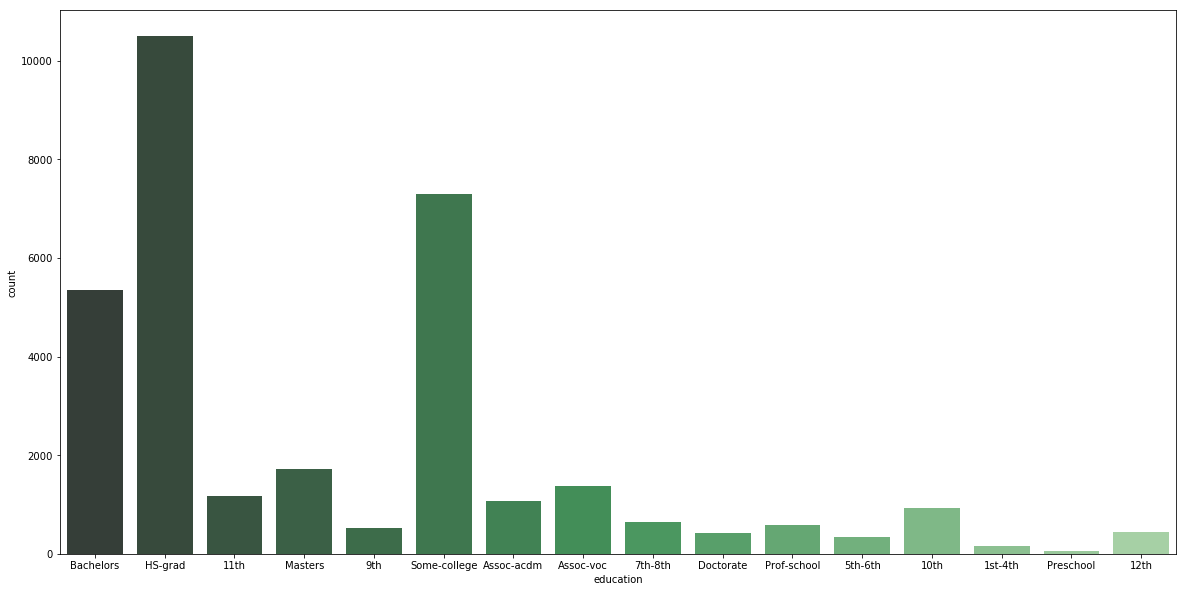

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x='education', data=df,palette="Greens_d")

In [7]:
print 'Средний возраст богатых {0} +- {1} и не богатых {2} +- {3}'.format(round(df[df.salary == '>50K']['age'].mean(), 2),
                            round(df[df.salary == '>50K']['age'].std(), 2), round(df[df.salary == '<=50K']['age'].mean(), 2),
                            round(df[df.salary == '<=50K']['age'].std(), 2))

Средний возраст богатых 44.25 +- 10.52 и не богатых 36.78 +- 14.02


In [8]:
df[df.salary == '>50K']['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th', '10th',
       '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

In [9]:
for (race, sex), df_sub in pd.groupby(df, ['race', 'sex']):
    print 'Race {0}, sex {1}'.format(race, sex)
    print df_sub['age'].describe()

Race Amer-Indian-Eskimo, sex Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race Amer-Indian-Eskimo, sex Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race Asian-Pac-Islander, sex Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race Asian-Pac-Islander, sex Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race Black, sex Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000
25%      

In [43]:
df[(df['sex'] == 'Male') & (df['marital-status'].isin(['Never-married', 
                                   'Separated', 'Divorced']))]['salary'].value_counts()['>50K']

658

In [42]:
df[(df['sex'] == 'Male') & (df['marital-status'].str.startswith('Married'))]['salary'].value_counts()['>50K']

5965

In [56]:
max_hours = df['hours-per-week'].max()
print 'Максимальное число рабочих часов {0}'.format(max_hours)

print 'Так работают {0} человек'.format(len(df[df['hours-per-week'] == max_hours]))


print 'Богатых среди них {0} процентов'.format(round(float(len(df[(df['hours-per-week'] == max_hours) & (df.salary == '>50K')])) / 
                                              len(df[df['hours-per-week'] == max_hours]) * 100))

Максимальное число рабочих часов 99
Так работают 85 человек
Богатых среди них 29.0 процентов


In [64]:
pd.pivot_table(df, index='native-country', columns='salary', values='hours-per-week', aggfunc=np.mean)

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
